In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [5]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.value_counts('Classification')

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 2. Do necessary pre-processing steps

<AxesSubplot:xlabel='Classification', ylabel='PL'>

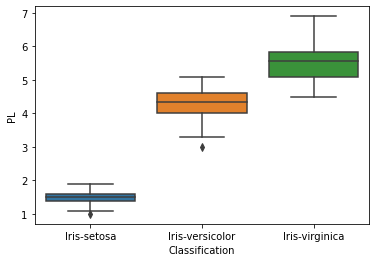

In [10]:
sns.boxplot(x='Classification',y='PL',data=data)

<AxesSubplot:xlabel='Classification', ylabel='SL'>

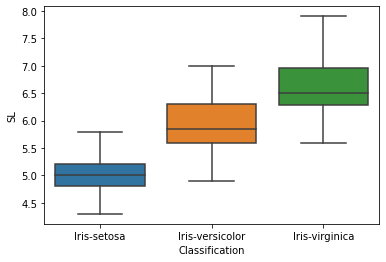

In [11]:
sns.boxplot(x='Classification',y='SL',data=data)

<AxesSubplot:xlabel='Classification', ylabel='SW'>

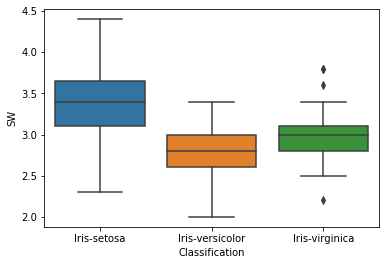

In [12]:
sns.boxplot(x='Classification',y='SW',data=data)

In [13]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
y=data['Classification']

In [16]:
X=data.drop(['Classification'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.20)

In [17]:
X_train.shape

(120, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
y_train.shape

(120,)

In [20]:
y_test.shape

(30,)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Logisitic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import sklearn
sklearn.metrics.precision_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn')
y_test.value_counts()

Iris-virginica     11
Iris-setosa        10
Iris-versicolor     9
Name: Classification, dtype: int64

In [22]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [23]:
print('accuracy is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 1.0
precision is: 1.0
recall is: 1.0
f1 is: 1.0


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc_model=KNeighborsClassifier()
knc_model.fit(X_train,y_train)
y_pred1=knc_model.predict(X_test)

In [25]:
confusion_matrix(y_test,y_pred1)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [26]:
print('accuracy is:', accuracy_score(y_test,y_pred1))
print('precision is:', precision_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred1,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 0.9666666666666667
precision is: 0.9694444444444444
recall is: 0.9666666666666667
f1 is: 0.9664109121909632


# Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
y_pred2=dtc_model.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [34]:
print('accuracy is:', accuracy_score(y_test,y_pred2))
print('precision is:', precision_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred2,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 1.0
precision is: 1.0
recall is: 1.0
f1 is: 1.0


# SVM

In [36]:
from sklearn.svm import SVC
svc_model=SVC(kernel='linear')
svc_model.fit(X_train,y_train)
y_pred3=svc_model.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred3)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()  
rf.fit(X_train, y_train)  
y_pred4=rf.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred4)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [42]:
print('accuracy is:', accuracy_score(y_test,y_pred4))
print('precision is:', precision_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('recall is:', recall_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))
print('f1 is:', f1_score(y_test,y_pred4,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

accuracy is: 1.0
precision is: 1.0
recall is: 1.0
f1 is: 1.0
